# Credit Card History Data set Analysis

In [1]:
import numpy as np  #mathmetical operations
import pandas as pd #for dataframes
import seaborn as sns #for visualisation
import matplotlib.pyplot as plt #for visualisation
from sklearn.preprocessing import LabelEncoder # for categorical data for target column
from sklearn.preprocessing import OneHotEncoder # for categorical data for all other columns
from sklearn.model_selection import train_test_split # splitting data into train and test
from sklearn import svm # classification model
from sklearn.linear_model import LogisticRegression # classification model
from sklearn.neighbors import KNeighborsClassifier # classification model
from sklearn.tree import DecisionTreeClassifier # classification model
from sklearn.naive_bayes import GaussianNB # classification model
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score #Performance Measure
from sklearn.model_selection import KFold #cross validation
from sklearn.model_selection import LeaveOneOut #cross validation
from sklearn.model_selection import cross_val_score #cross validation

In [2]:
Df=pd.read_csv('D:\python iitb cous\python tutorial\ML algorithms\Decision tree Classification\credit_history.csv')
Df

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28
...,...,...,...,...,...,...,...
7722,1,6000,C,6.0,RENT,47628.0,24
7723,1,1500,B,5.0,RENT,18000.0,21
7724,1,4100,B,18.0,RENT,57000.0,26
7725,1,2000,B,NaN,RENT,25000.0,25


In [3]:
# We will try to predict the column default
# Dataset belongs to credit card company. 
# Company wants to understand their customers.
Df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [4]:
Df.tail()

,default,amount,grade,years,ownership,income,age
7722,1,6000,C,6.0,RENT,47628.0,24
7723,1,1500,B,5.0,RENT,18000.0,21
7724,1,4100,B,18.0,RENT,57000.0,26
7725,1,2000,B,NaN,RENT,25000.0,25
7726,1,6000,C,0.0,RENT,45000.0,25


In [5]:
Df.shape

(7727, 7)

# Dealing With Missing Values

In [6]:
# Checking missing value in any of these columns 
Df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [7]:
missing=Df[Df['years'].isnull()==True]
missing.head()

,default,amount,grade,years,ownership,income,age
39,0,18000,E,NaN,OWN,72000.0,25
44,1,4000,A,NaN,RENT,40000.0,25
52,0,1800,B,NaN,RENT,14400.0,41
133,1,13200,D,NaN,MORTGAGE,49800.0,30
146,0,6500,B,NaN,MORTGAGE,85000.0,34


In [8]:
Df.describe()

,default,amount,years,income,age
count,7727.000000,7727.000000,7448.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.086332,6.337197e+04,27.542125
std,0.499568,6298.595800,6.700758,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,1.200000e+06,94.000000


In [9]:
# Column year contains 279 misisng values.
# we might want to impute these missing values.
Df['years'].describe() 

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

# Data distributions 

Feature amount


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


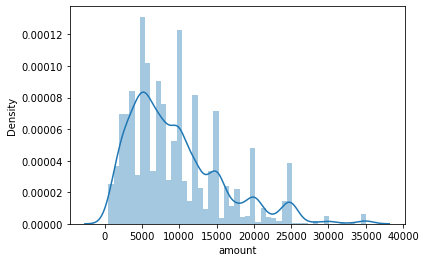

Feature years


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


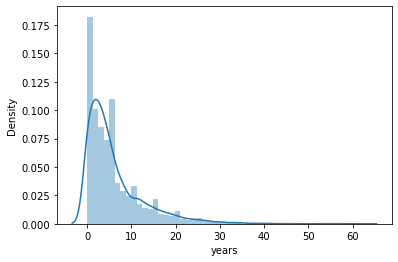

Feature income


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


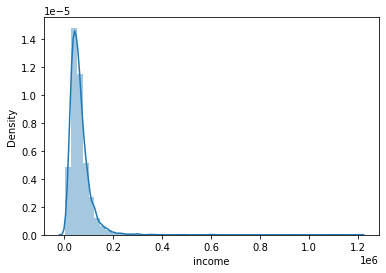

Feature age


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


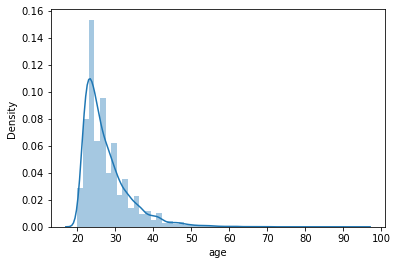

In [10]:
col=['amount', 'years', 'income', 'age']
for i in col:
    print('Feature', i)
    sns.distplot(Df[i])
    plt.show()
    

In [11]:
# From the above graph we can say that data is leftskewed
# so for imputing missing values we use median 
# so we have missing values in years.median is used to fill the missing values
Df['years']=Df['years'].fillna(Df['years'].median())

In [12]:
# Now check wether missing values are imputed with meadian 
Df.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

# Outliers 

Feature  amount


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


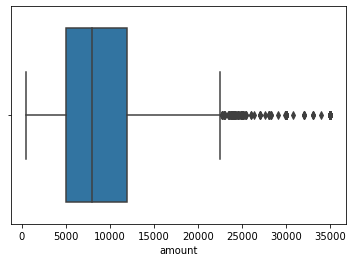

Feature  years


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


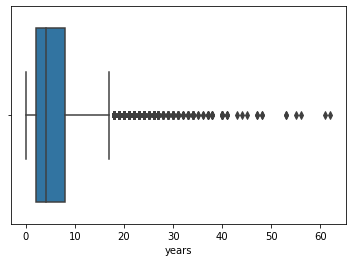

Feature  income


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


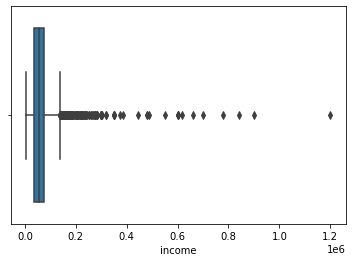

Feature  age


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


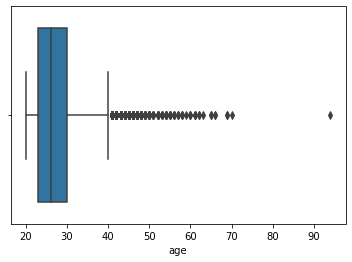

In [13]:
# In order to check outliers we can use Boxplots
cols=['amount', 'years', 'income', 'age']
for i in cols:
    print("Feature ", i)
    sns.boxplot(Df[i])
    plt.show()

In [14]:
 # from the box plot we can see that there are number of outliers in features
def outlier(list):
    import pandas as pd
    df1=pd.Series(list)
    q1=df1.quantile(0.25)
    q3=df1.quantile(0.75)
    iqr=q3-q1
    left=q1-(1.5*iqr)
    right=q3+(1.5*iqr)
    outliers=[]
    for i in list:
        if i<left or i>right:
            outliers.append(i)
    print ('data range', left,'to', right)
    if len(outliers)>0:
        print ('Outliers are ', outliers)
    else:
        print ('There are no outliers in your data')
    return len(outliers)

In [15]:
cols=['amount', 'years', 'income', 'age']
for i in cols:
    print("Feature ", i)
    outlier(Df[i])

Feature  amount
data range -5500.0 to 22500.0
Outliers are  [25000, 25000, 25000, 25000, 25000, 25000, 25000, 24000, 24000, 23500, 24000, 24000, 25000, 32000, 22750, 33000, 23000, 25000, 24000, 24175, 35000, 28000, 24000, 25000, 25000, 25000, 24250, 30000, 24000, 25000, 25000, 27575, 25000, 25000, 26400, 25000, 25000, 25000, 32000, 24000, 25000, 29850, 35000, 25000, 25000, 25000, 25000, 24500, 23750, 24250, 25000, 25000, 25000, 26000, 28000, 35000, 35000, 23000, 23975, 24250, 25000, 34000, 35000, 25000, 25000, 23500, 24500, 25000, 25000, 25000, 25000, 24000, 25000, 25000, 25000, 24000, 25000, 25000, 24000, 25000, 23450, 24250, 25000, 24000, 25000, 24000, 28000, 25000, 25000, 30000, 24800, 24250, 25000, 25000, 27000, 25000, 23100, 25000, 35000, 23500, 25000, 35000, 25000, 25000, 25000, 25000, 25000, 30000, 35000, 24000, 30000, 25000, 25000, 35000, 25000, 25000, 25000, 25000, 35000, 35000, 25000, 25000, 25000, 25000, 25000, 25000, 25000, 24000, 32000, 24000, 35000, 23000, 30000, 24000, 2

In [16]:
#Df[Df['age']==94]
Df1=Df.drop([Df.index[7714]])

In [17]:
Df1.shape

(7726, 7)

In [18]:
Df1['years']=Df1['years'].mask(Df1['years']>17,Df1['years'].median())
Df1['amount']=Df1['amount'].mask(Df1['amount']>22500,Df1['amount'].median())
Df1['income']=Df1['income'].mask(Df1['income']>136491.25,Df1['income'].median())

Feature  amount


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


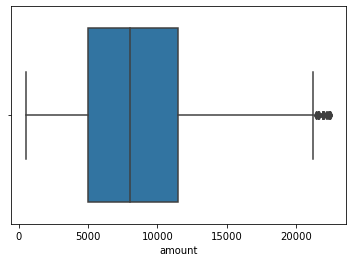

Feature  years


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


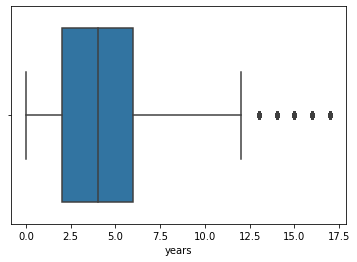

Feature  income


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


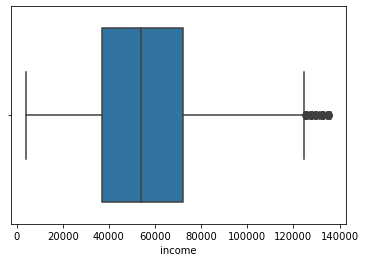

Feature  age


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


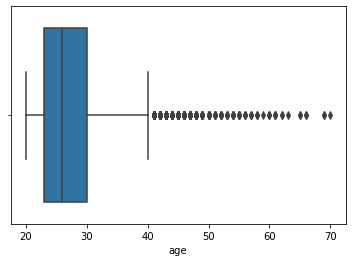

In [19]:
# After dealing with outliers just to check how outliers are implemented 
cols=['amount', 'years', 'income', 'age']
for i in cols:
    print("Feature ", i)
    sns.boxplot(Df1[i])
    plt.show()

Feature amount


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


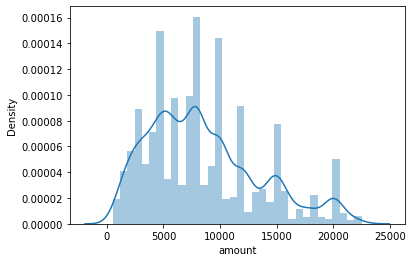

Feature years


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


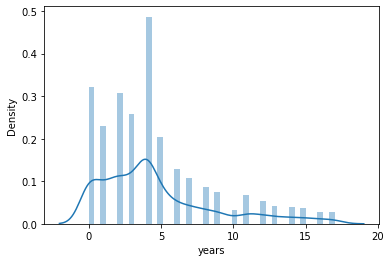

Feature income


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


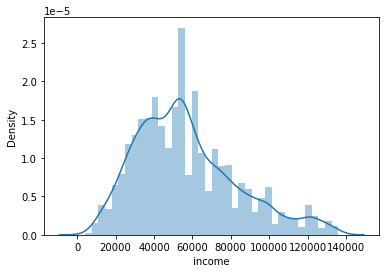

Feature age


C:\Users\compaq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


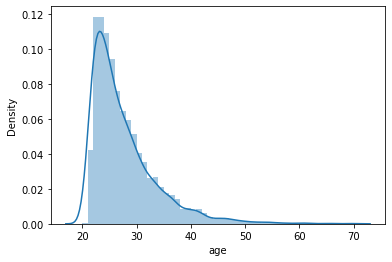

In [20]:
col=['amount', 'years', 'income', 'age']
for i in col:
    print('Feature', i)
    sns.distplot(Df1[i])
    plt.show()

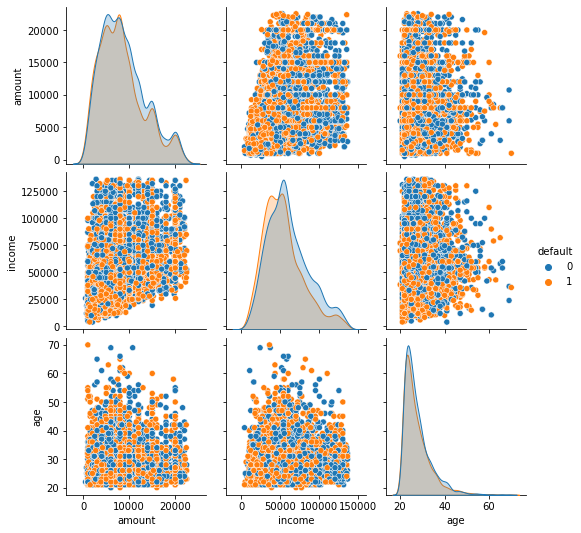

In [21]:
Df2=Df1.drop(['years'], axis=1)
sns.pairplot(Df2,hue='default')

# Correlations

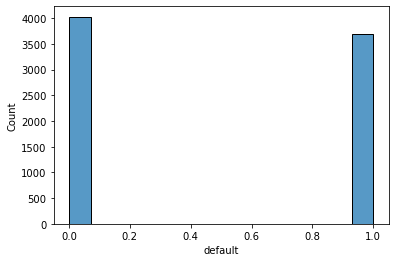

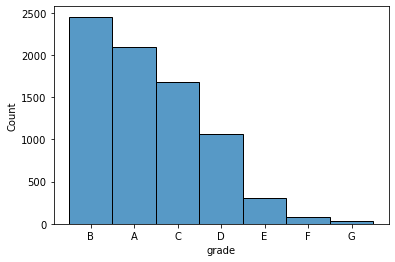

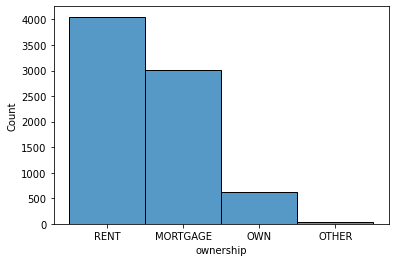

In [22]:
## Now we will consider Catogorical Features
cat_col=['default','grade','ownership']
for i in cat_col:
    sns.histplot(Df1[i])
    plt.show()

In [23]:
corr=Df1.corr()
corr

,default,amount,years,income,age
default,1.000000,-0.036807,0.000742,-0.128632,-0.018646
amount,-0.036807,1.000000,0.084280,0.318299,0.020469
years,0.000742,0.084280,1.000000,0.162982,-0.001959
income,-0.128632,0.318299,0.162982,1.000000,0.062583
age,-0.018646,0.020469,-0.001959,0.062583,1.000000


<AxesSubplot:>

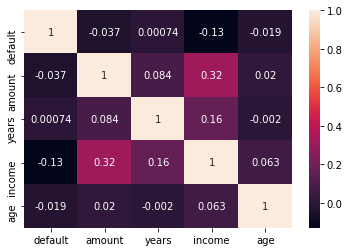

In [24]:
sns.heatmap(corr,annot=True)

In [25]:
Final_p=['amount', 'grade','years','ownership','income', 'age']
# Selecting final columns
DataForML=Df[Final_p]
DataForML.head()
# Saving this final data for reference during deployment
import  pickle
with open('DataForML.pkl', 'wb') as fileWriteStream:
    pickle.dump(DataForML, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

In [26]:
# Dependent and independent variable
y=Df1['default']
y.head()


0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [27]:
x=Df1.drop('default',axis=1)
x.head()

,amount,grade,years,ownership,income,age
0,1000.0,B,2.0,RENT,19200.0,24
1,6500.0,A,2.0,MORTGAGE,66000.0,28
2,2400.0,A,2.0,RENT,60000.0,36
3,10000.0,C,3.0,RENT,62000.0,24
4,4000.0,C,2.0,RENT,20000.0,28


In [28]:
Df1["grade"].unique()

array(['B', 'A', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [29]:
Df1["ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [30]:
# Some variables in the predictor matrix that are categorical Variables
# Creating a numeric representation for non numeric(categorical) variables
# ONE HOT ENCODING
# Get one hot encoding using pd.get_dummies()
x=pd.get_dummies(x)
x.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000.0,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500.0,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400.0,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000.0,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000.0,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


# Splitting Data

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=200)
print(x_train.shape)
print(y_test.shape)

(6180, 15)
(1546,)


# 1. SVM

In [32]:
from sklearn import svm #support vector machine # 1.step
model1=svm.SVC(kernel='rbf') # 2. step craeting object,  kernel='rbf' means by default it will go non-linear
model1.fit(x_train, y_train) #3. Training model 
model1.score(x_train,y_train)*100

56.26213592233009

In [33]:
svm_pred=model1.predict(x_test)
svm_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Performance of SVM

In [34]:
print(confusion_matrix(svm_pred, y_test))
print(model1.score(x_test,y_test)*100)

[[549 433]
 [253 311]]
55.627425614489


# 2. KNN model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier #step -1
for i in range(1,15):
    model2 = KNeighborsClassifier(n_neighbors=i)  #K=1 , clf is my model
    model2.fit(x_train, y_train) #traininig algorithm  
    print('neighbors k=',i,model2.score(x_test, y_test)) #test
    print ('******************************')


neighbors k= 1 0.5575679172056921
******************************
neighbors k= 2 0.5426908150064683
******************************
neighbors k= 3 0.5316946959896507
******************************
neighbors k= 4 0.5213454075032341
******************************
neighbors k= 5 0.5258732212160414
******************************
neighbors k= 6 0.5304010349288486
******************************
neighbors k= 7 0.5135834411384217
******************************
neighbors k= 8 0.5420439844760673
******************************
neighbors k= 9 0.5446313065976714
******************************
neighbors k= 10 0.5504527813712807
******************************
neighbors k= 11 0.5413971539456662
******************************
neighbors k= 12 0.5498059508408797
******************************
neighbors k= 13 0.5523932729624839
******************************
neighbors k= 14 0.556921086675291
******************************


In [36]:
model2.kneighbors
knn_pre=model2.predict(x_test)

# performance of KNN

In [37]:
print(confusion_matrix(knn_pre,y_test))
print(model2.score(x_test,y_test)*100)

[[537 420]
 [265 324]]
55.692108667529105


# 3. Naive Bayes

In [38]:
model3=GaussianNB()
model3.fit(x_train, y_train)
gnb_pred=model3.predict(x_test)

# performance of Naive Bayes

In [39]:
print(confusion_matrix(gnb_pred,y_test))
print(model3.score(x_test,y_test))

[[559 370]
 [243 374]]
0.6034928848641656


# 4. LOGISTIC REGRESSION

In [40]:
Lr=LogisticRegression()
model4=Lr.fit(x_train,y_train)
Lr_pred=model4.predict(x_test)

# Performance of Logistic Regression

In [41]:
print(confusion_matrix(Lr_pred,y_test))
print(model4.score(x_test,y_test))

[[570 454]
 [232 290]]
0.55627425614489


# 5.Decision Tree Classifiers

In [42]:
model5=DecisionTreeClassifier(max_depth=5, random_state=None, criterion='gini', splitter='best') 
model5.fit(x_train,y_train)
D_pred=model5.predict(x_test)

# Performance of Decision Tree Classifiers

In [43]:
print(confusion_matrix(D_pred,y_test))
print(model5.score(x_test, y_test)*100)

[[548 314]
 [254 430]]
63.26002587322122


# Cross Validation

In [44]:
# Initialize parameters
num_folds = 10 #K=10
seed = 7 #Random_state
kfold = KFold(n_splits=num_folds, random_state=seed) #K-fold algorithm
model1=svm.SVC(kernel='rbf')
model2=KNeighborsClassifier(n_neighbors=5)
model3=GaussianNB()
model4=LogisticRegression()
model5=model5=DecisionTreeClassifier(max_depth=5, random_state=None, criterion='gini', splitter='best')

C:\Users\compaq\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [45]:
mo=[model1,model2,model3,model4,model5]
for i in mo:
    results1 = cross_val_score(i, x, y, cv=kfold)
    print("results1 of =", i)
    print(results1)
    print("Accuracy: ", results1*100.0)
    print("mean of accuracy", results1.mean()*100.0)
    print ("std.deviation of accuracies", results1.std()*100)
    print("********************************8")


results1 of = SVC()
[0.55886158 0.5614489  0.55109961 0.59896507 0.53945666 0.54592497
 0.53367876 0.54015544 0.54792746 0.55440415]
Accuracy:  [55.88615783 56.14489004 55.10996119 59.89650712 53.94566624 54.59249677
 53.36787565 54.01554404 54.79274611 55.44041451]
mean of accuracy 55.31922594829377
std.deviation of accuracies 1.7381729300221735
********************************8
results1 of = KNeighborsClassifier()
[0.55239327 0.53298836 0.54721863 0.5549806  0.57956016 0.52263907
 0.5388601  0.53367876 0.52849741 0.54533679]
Accuracy:  [55.2393273  53.29883571 54.72186287 55.49805951 57.95601552 52.26390686
 53.88601036 53.36787565 52.84974093 54.53367876]
mean of accuracy 54.36153134614482
std.deviation of accuracies 1.55468146802198
********************************8
results1 of = GaussianNB()
[0.57697283 0.56403622 0.55627426 0.61578266 0.58344114 0.57309185
 0.60362694 0.63082902 0.62305699 0.6126943 ]
Accuracy:  [57.69728331 56.40362225 55.62742561 61.57826649 58.34411384 57.3091

# hence we will consider descion tree classifier as  best model 

In [46]:
Final_model=DecisionTreeClassifier(max_depth=5, random_state=None, criterion='gini', splitter='best')
Final_model.fit(x_train,y_train)
F_pred=Final_model.predict(x_test)

In [47]:
print(confusion_matrix(F_pred,y_test))
print(Final_model.score(x_test,y_test))

[[548 313]
 [254 431]]
0.6332470892626132


# create pickle file

In [48]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
# dump information to that file


with open('creditcard.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    

# checking
Loaded_model=pickle.load(open('creditcard.pkl','rb'))
result=Loaded_model.score(x_test,y_test)
print(result)
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

0.6332470892626132
pickle file of Predictive Model is saved at Location: C:\Users\compaq\Documents\Deployment_m1


# REAL TIME PREDICTION

In [49]:
def Creditcard(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    print(Num_Inputs)
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
   
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
    

    # Generating the input values to the model
    X=InputData.values[0:Num_Inputs]
    
    # Loading the Function from pickle file
    import pickle
    with open('creditcard.pkl', 'rb') as fileReadStream:
        Final_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
   
    # Genrating Predictions
    Prediction=Final_model.predict(X)
    if (Prediction==0):
        print("Customer is non defaulter means he is not eligible for credit card")
    else:
        print("Customer is defaulter means he is  eligible for credit card")
    return
            
    

In [50]:
# Creating the function which can take inputs and return predictions
def creditcardPrediction(inp_amount, inp_grade, inp_year, inp_ownership,
           inp_income, inp_age):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_amount, inp_grade, inp_year, inp_ownership,
           inp_income, inp_age]],
     columns=['amount', 'grade','years','ownership','income', 'age'])

        # Calling the function defined above using the input parameters
    Predictions=Creditcard(InputData= SampleInputData)
    
    return

In [52]:
years = int(input("year"))
Amount=float(input("Amount"))
grade=input("grade").upper()
income=int(input('income'))
age=int(input('age'))
ownership=input('ownership')

# Function call
creditcardPrediction(Amount, grade, years,ownership,income,age)

year6
Amount10000
gradeA
income10000
age34
ownershipOWN
1
Customer is non defaulter means he is not eligible for credit card
